
The code used is on top of Epstein Model of Civil Violence 

Civilians can have four states : Susciptible, Honest, Corrupted or Jailed.

The corruption density is specified using corruption_level while the susceptible density is controlled by susceptible_level. The honest density = 1 - (corruption_level + susceptible_level).

Civilians can have jobs and the initial rate is specified using initial_unemployment_rate. 





In [1]:
#!pip3 install import-ipynb
#!pip3 install mesa

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from epstein_civil_violence.agent import Citizen, Cop
from epstein_civil_violence.model import EpsteinCivilViolence

In [3]:
model = EpsteinCivilViolence(height=50, 
                           width=50, 
                           citizen_density=.7, 
                           cop_density=.044, 
                           citizen_vision=7, 
                           cop_vision=7, 
                           legitimacy=.8, 
                           max_jail_term=4, 
                           initial_unemployment_rate = 0.05,
                           corruption_level = 0.20,
                           honest_level = 0.05,
                           corruption_transmission_prob = 0.001,
                           honest_transmission_prob = 0.0001,
                           max_corruption_saturation = 0.34,
                           max_honest_saturation = 0.14,

                           max_iters=60) # cap the number of steps the model takes
model.run_model()


In [4]:
model_out = model.datacollector.get_model_vars_dataframe()
print(model_out)


    Quiescent  Active  Jailed  Employed  Corrupted  Honest  Susceptible
0        1772       0       0      1675        365      94         1313
1        1404     346      21      1658        365      94         1313
2        1388     314      47      1651        366      94         1312
3        1356     311      56      1640        368      94         1310
4        1346     288      65      1625        370      94         1308
..        ...     ...     ...       ...        ...     ...          ...
57        466     471      25       974        525      94         1153
58        475     449      20       974        529      94         1149
59        445     470      15       974        531      94         1147
60        445     453      21       974        533      94         1145
61        429     461      19       974        534      94         1144

[62 rows x 7 columns]


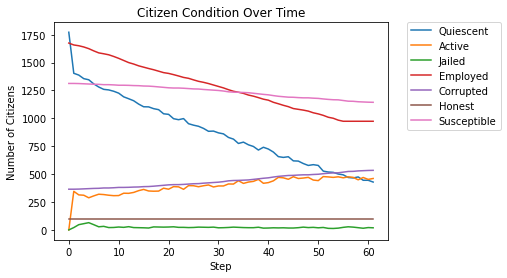

In [5]:
ax = model_out.plot()
ax.set_title('Citizen Condition Over Time')
ax.set_xlabel('Step')
ax.set_ylabel('Number of Citizens')
_ = ax.legend(bbox_to_anchor=(1.35, 1.025))

Experiment 1 : Unemployment rate : 0.06

In [6]:
model_1 = EpsteinCivilViolence(height=25, 
                           width=25, 
                           citizen_density=.7, 
                           cop_density=.034, 
                           citizen_vision=5, 
                           cop_vision=5, 
                           legitimacy=.8, 
                           max_jail_term=4, 
                           initial_unemployment_rate = 0.06,
                           corruption_level = 0.08,
                           honest_level = 0.03,
                           corruption_transmission_prob = 0.009,
                           honest_transmission_prob = 0.009,
                           max_corruption_saturation = 0.45,
                           max_honest_saturation = 0.25,
                           max_iters=135) # cap the number of steps the model takes
model_1.run_model()
model_1_output = model_1.datacollector.get_model_vars_dataframe()
print(model_1_output)

     Quiescent  Active  Jailed  Employed  Corrupted  Honest  Susceptible
0          442       0       0       411         39       9          394
1          314     127       0       408         39       9          394
2          325     108       5       406         39       9          394
3          312     114      10       404         39       9          394
4          317     105      11       404         39       9          394
..         ...     ...     ...       ...        ...     ...          ...
132         88     155       1       243        108       9          325
133         90     151       2       243        108       9          325
134         91     148       1       243        109       9          324
135         96     140       2       243        109       9          324
136         92     144       1       243        109       9          324

[137 rows x 7 columns]


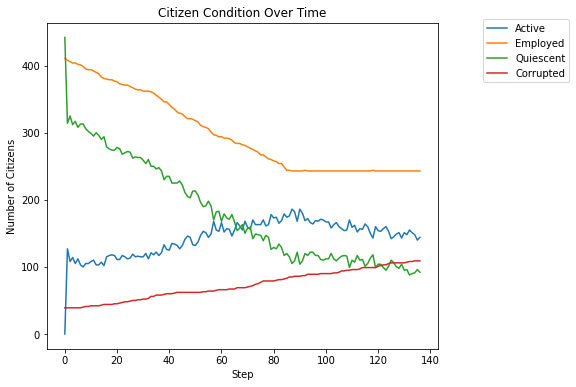

In [7]:
ax = model_1_output[['Active','Employed','Quiescent','Corrupted']].plot(figsize=(7,6))
ax.set_title('Citizen Condition Over Time')
ax.set_xlabel('Step')
ax.set_ylabel('Number of Citizens')
_ = ax.legend(bbox_to_anchor=(1.35, 1.025))

Experiment 2 : Unemployment rate : 0.15

In [8]:
model_2 = EpsteinCivilViolence(height=25, 
                           width=25, 
                           citizen_density=.7, 
                           cop_density=.034, 
                           citizen_vision=5, 
                           cop_vision=5, 
                           legitimacy=.8, 
                           max_jail_term=4, 
                           initial_unemployment_rate = 0.15,
                           corruption_level = 0.08,
                           honest_level = 0.03,
                           corruption_transmission_prob = 0.009,
                           honest_transmission_prob = 0.009,
                           max_corruption_saturation = 0.45,
                           max_honest_saturation = 0.25,
                           max_iters=135) # cap the number of steps the model takes
model_2.run_model()
model_2_output = model_2.datacollector.get_model_vars_dataframe()

   Active  Employed  Quiescent
1     160       373        282


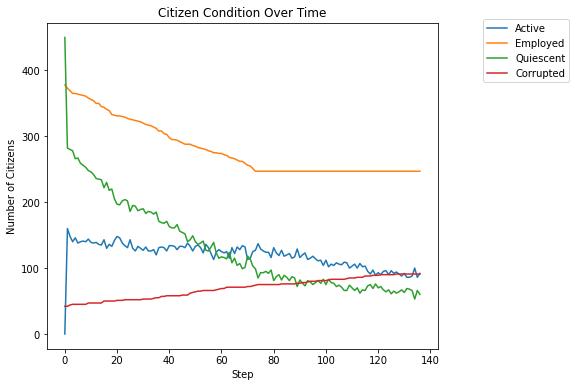

In [9]:
ax = model_2_output[['Active','Employed','Quiescent','Corrupted']].plot(figsize=(7,6))
ax.set_title('Citizen Condition Over Time')
ax.set_xlabel('Step')
ax.set_ylabel('Number of Citizens')
_ = ax.legend(bbox_to_anchor=(1.35, 1.025))

x = model_2_output[['Active','Employed','Quiescent']]
print(x[x.Active == x.Active.max()])

Experiment 3: Corruption Transmission prob : 0.1

In [10]:
model_3 = EpsteinCivilViolence(height=25, 
                           width=25, 
                           citizen_density=.7, 
                           cop_density=.034, 
                           citizen_vision=5, 
                           cop_vision=5, 
                           legitimacy=.8, 
                           max_jail_term=4, 
                           initial_unemployment_rate = 0.08,
                           corruption_level = 0.08,
                           honest_level = 0.03,
                           corruption_transmission_prob = 0.1,
                           honest_transmission_prob = 0.009,
                           max_corruption_saturation = 0.45,
                           max_honest_saturation = 0.25,
                           max_iters=135) # cap the number of steps the model takes
model_3.run_model()
model_3_output = model_3.datacollector.get_model_vars_dataframe()

    Active  Employed  Quiescent  Corrupted
71     104       300        184         49


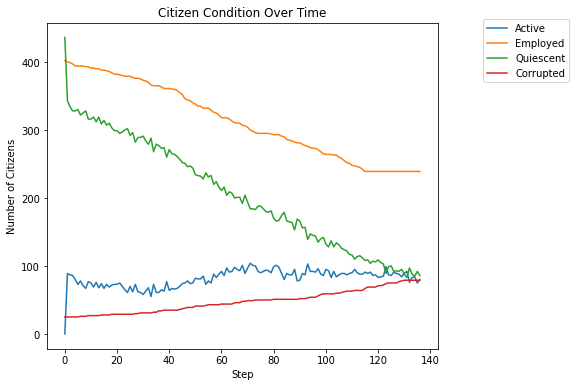

In [11]:
ax = model_3_output[['Active','Employed','Quiescent','Corrupted']].plot(figsize=(7,6))
ax.set_title('Citizen Condition Over Time')
ax.set_xlabel('Step')
ax.set_ylabel('Number of Citizens')
_ = ax.legend(bbox_to_anchor=(1.35, 1.025))

x = model_3_output[['Active','Employed','Quiescent','Corrupted']]
print(x[x.Active == x.Active.max()])

In [1]:
exec(open("Visualization.py").read())


Interface starting at http://127.0.0.1:8521


RuntimeError: This event loop is already running

Socket opened!
{"type":"reset"}
{"type":"submit_params","param":"max_jail_term","value":1100}
{"type":"submit_params","param":"max_jail_term","value":1200}
{"type":"submit_params","param":"max_jail_term","value":1300}
{"type":"submit_params","param":"max_jail_term","value":1400}
{"type":"submit_params","param":"max_jail_term","value":1500}
{"type":"submit_params","param":"max_jail_term","value":1600}
{"type":"submit_params","param":"max_jail_term","value":1700}
{"type":"submit_params","param":"max_jail_term","value":1800}
{"type":"submit_params","param":"max_jail_term","value":1900}
{"type":"submit_params","param":"max_jail_term","value":2000}
{"type":"submit_params","param":"max_jail_term","value":2100}
{"type":"submit_params","param":"max_jail_term","value":2200}
{"type":"submit_params","param":"max_jail_term","value":2300}
{"type":"submit_params","param":"max_jail_term","value":2400}
{"type":"submit_params","param":"max_jail_term","value":2500}
{"type":"submit_params","param":"max_j